In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_train = pd.read_csv('base_train.csv')
print(df_train.shape)
df_train.head()

(31478, 21)


,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,...,NRO_DIAS_CONTACTO,CONTACTOS_PREVIOS,RESULT_PREVIO,TASA_VAR_EMP,IPC,ICC,INGRESO,MONTO_DEUDA,MONTO_TRANSAC,ACEPTACION
0,24004,27,self-employed,single,university.degree,no,no,no,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1285.0,24260.77053,5242.101608,0
1,24003,43,technician,single,professional.course,no,no,no,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1287.0,28980.09457,5538.942316,0
2,23998,44,admin.,married,high.school,no,yes,no,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1153.0,10937.49426,7630.664800,0
3,24005,46,admin.,divorced,high.school,no,yes,no,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1125.0,29232.60368,7008.855259,0
4,23999,42,admin.,married,high.school,no,yes,yes,telephone,aug,...,999,0,nonexistent,-0.1,93.798,-40.4,1443.0,32636.30279,3012.416629,1


In [13]:
df_train.columns

Index(['ID', 'EDAD', 'TRABAJO', 'ESTADO_CIVIL', 'EDUCACION', 'INCUMPLIMIENTO',
       'VIVIENDA', 'PRESTAMO', 'TIPO_CONTACTO', 'MES', 'CAMPANA',
       'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'RESULT_PREVIO',
       'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC',
       'ACEPTACION'],
      dtype='object')

In [39]:
target = 'ACEPTACION'

vars_cat = ['TRABAJO', 'ESTADO_CIVIL', 'EDUCACION', 'INCUMPLIMIENTO',
       'VIVIENDA', 'PRESTAMO', 'TIPO_CONTACTO', 'MES',  'RESULT_PREVIO']

vars_num = ['EDAD', 'CAMPANA', 'NRO_DIAS_CONTACTO', 'CONTACTOS_PREVIOS', 'TASA_VAR_EMP', 'IPC', 'ICC', 'INGRESO', 'MONTO_DEUDA', 'MONTO_TRANSAC']

## Target

In [35]:
import pandas as pd

def dist_campo(df, campo, id_col='ID'):
    
    dist = (
        df.groupby(campo)
          .agg(CANT=(id_col, 'count'))
          .reset_index()
    )
    dist['Total %'] = round(dist['CANT'] / dist['CANT'].sum() * 100, 2)
    dist = dist.sort_values(by='CANT', ascending=False)
    return dist


In [25]:
dist_target = df_train.groupby(target).agg(CANT=('ID','count')).reset_index()
dist_target['Total %'] = round(dist_target['CANT'] / dist_target['CANT'].sum() * 100, 2)
dist_target

,ACEPTACION,CANT,Total %
0,0,27944,88.77
1,1,3534,11.23


In [29]:
dist_campo(df_train, target)

,ACEPTACION,CANT,Total %
0,0,27944,88.77
1,1,3534,11.23


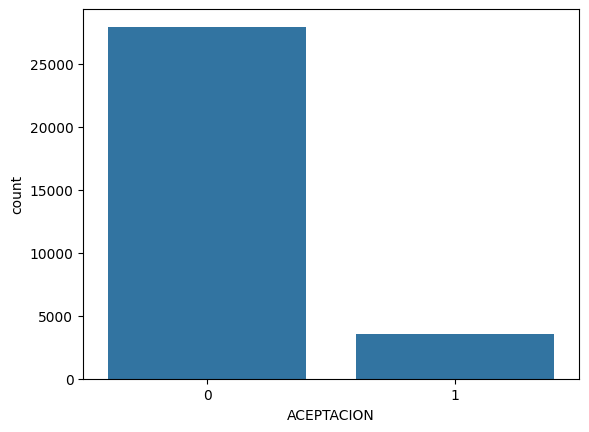

In [22]:
sns.countplot(x=target, data=df_train)
plt.show()

## VARS CATEGÓRICAS

#### TRABAJO

In [36]:
dist_campo(df_train, 'TRABAJO')

,TRABAJO,CANT,Total %
0,admin.,7958,25.28
1,blue-collar,7106,22.57
9,technician,5147,16.35
7,services,3016,9.58
4,management,2233,7.09
5,retired,1330,4.23
6,self-employed,1110,3.53
2,entrepreneur,1103,3.50
3,housemaid,814,2.59
10,unemployed,770,2.45


| TRABAJO (original) | TRABAJO (traducido)        | CANT | Total % |
| ------------------ | -------------------------- | ---- | ------- |
| admin.             | Administrativo             | 7958 | 25.28   |
| blue-collar        | Obrero / Trabajador manual | 7106 | 22.57   |
| technician         | Técnico                    | 5147 | 16.35   |
| services           | Servicios                  | 3016 | 9.58    |
| management         | Gerente / Administración   | 2233 | 7.09    |
| retired            | Jubilado                   | 1330 | 4.23    |
| self-employed      | Independiente              | 1110 | 3.53    |
| entrepreneur       | Empresario / Emprendedor   | 1103 | 3.50    |
| housemaid          | Empleada doméstica         | 814  | 2.59    |
| unemployed         | Desempleado                | 770  | 2.45    |
| student            | Estudiante                 | 637  | 2.02    |
| unknown            | Desconocido                | 254  | 0.81    |


In [40]:
for cat in vars_cat:
    print(f"#### {cat}")
    display(dist_campo(df_train, cat))

#### TRABAJO


,TRABAJO,CANT,Total %
0,admin.,7958,25.28
1,blue-collar,7106,22.57
9,technician,5147,16.35
7,services,3016,9.58
4,management,2233,7.09
5,retired,1330,4.23
6,self-employed,1110,3.53
2,entrepreneur,1103,3.50
3,housemaid,814,2.59
10,unemployed,770,2.45


#### ESTADO_CIVIL


,ESTADO_CIVIL,CANT,Total %
5,married,18963,60.24
7,single,8733,27.74
2,divorced,3480,11.06
0,married,118,0.37
9,unknown,62,0.20
6,singgle,54,0.17
4,marrid,30,0.10
3,divorced,23,0.07
8,single,10,0.03
1,d_ivorced,5,0.02


#### EDUCACION


,EDUCACION,CANT,Total %
6,university.degree,9266,29.44
3,high.school,7228,22.96
2,basic.9y,4669,14.83
5,professional.course,4035,12.82
0,basic.4y,3197,10.16
1,basic.6y,1751,5.56
7,unknown,1315,4.18
4,illiterate,17,0.05


#### INCUMPLIMIENTO


,INCUMPLIMIENTO,CANT,Total %
0,no,24909,79.13
1,unknown,6566,20.86
2,yes,3,0.01


#### VIVIENDA


,VIVIENDA,CANT,Total %
2,yes,16507,52.44
0,no,14233,45.22
1,unknown,738,2.34


#### PRESTAMO


,PRESTAMO,CANT,Total %
0,no,25997,82.59
2,yes,4743,15.07
1,unknown,738,2.34


#### TIPO_CONTACTO


,TIPO_CONTACTO,CANT,Total %
0,cellular,19964,63.42
1,telephone,11514,36.58


#### MES


,MES,CANT,Total %
6,may,10535,33.47
9,sep,5463,17.35
8,oct,4721,15.00
4,jun,4047,12.86
7,nov,3099,9.84
0,apr,2030,6.45
1,aug,559,1.78
3,jul,441,1.40
5,mar,430,1.37
2,dec,153,0.49


#### RESULT_PREVIO


,RESULT_PREVIO,CANT,Total %
1,nonexistent,27136,86.21
0,failure,3281,10.42
2,success,1061,3.37


| ESTADO_CIVIL (original) | ESTADO_CIVIL (traducido / corregido) | CANT  | Total % |
| ----------------------- | ------------------------------------ | ----- | ------- |
| married                 | Casado(a)                            | 18963 | 60.24   |
| single                  | Soltero(a)                           | 8733  | 27.74   |
| divorced                | Divorciado(a)                        | 3480  | 11.06   |
| married                 | Casado(a)                            | 118   | 0.37    |
| unknown                 | Desconocido                          | 62    | 0.20    |
| singgle                 | Soltero(a) *(corregido)*             | 54    | 0.17    |
| marrid                  | Casado(a) *(corregido)*              | 30    | 0.10    |
| divorced                | Divorciado(a)                        | 23    | 0.07    |
| single                  | Soltero(a)                           | 10    | 0.03    |
| d_ivorced               | Divorciado(a) *(corregido)*          | 5     | 0.02    |


| EDUCACION (original) | EDUCACIÓN (traducido)               | CANT | Total % |
| -------------------- | ----------------------------------- | ---- | ------- |
| university.degree    | Universitario / Grado universitario | 9266 | 29.44   |
| high.school          | Secundaria completa                 | 7228 | 22.96   |
| basic.9y             | Educación básica (9 años)           | 4669 | 14.83   |
| professional.course  | Curso técnico / Profesional técnico | 4035 | 12.82   |
| basic.4y             | Educación básica (4 años)           | 3197 | 10.16   |
| basic.6y             | Educación básica (6 años)           | 1751 | 5.56    |
| unknown              | Desconocido                         | 1315 | 4.18    |
| illiterate           | Analfabeto                          | 17   | 0.05    |


| INCUMPLIMIENTO (original) | INCUMPLIMIENTO (traducido) | CANT   | Total % |
| ------------------------- | -------------------------- | ------ | ------- |
| no                        | No incumplió               | 24 909 | 79.13   |
| unknown                   | Desconocido                | 6 566  | 20.86   |
| yes                       | Sí incumplió               | 3      | 0.01    |


In [41]:
df_train['INCUMPLIMIENTO'] = df_train['INCUMPLIMIENTO'].replace({
    'no': 'No incumplió',
    'yes': 'Sí incumplió',
    'unknown': 'Desconocido'
})

In [42]:
dist_campo(df_train, 'INCUMPLIMIENTO')

,INCUMPLIMIENTO,CANT,Total %
1,No incumplió,24909,79.13
0,Desconocido,6566,20.86
2,Sí incumplió,3,0.01


In [45]:
df_train['ESTADO_CIVIL'] = df_train['ESTADO_CIVIL'].replace({
    'd_ivorced': 'No incumplió'
})

In [46]:
dist_campo(df_train, 'ESTADO_CIVIL')

,ESTADO_CIVIL,CANT,Total %
5,married,18963,60.24
7,single,8733,27.74
2,divorced,3480,11.06
0,married,118,0.37
9,unknown,62,0.20
6,singgle,54,0.17
4,marrid,30,0.10
3,divorced,23,0.07
8,single,10,0.03
1,No incumplió,5,0.02


In [62]:
# Contar registros por ESTADO_CIVIL y TARGET
tabla = df_train.groupby(['ESTADO_CIVIL', target])['ID'].count().reset_index()

# Pivotear
tabla = tabla.pivot(index='ESTADO_CIVIL', columns=target, values='ID').fillna(0)

# Quitar el nombre del índice (por ejemplo "ACEPTACION")
tabla.columns.name = None

# Renombrar columnas
tabla = tabla.rename(columns={0: 'Target 0', 1: 'Target 1'})

# Calcular el porcentaje del Target 1
tabla['% Target=1'] = (tabla['Target 1'] / (tabla['Target 0'] + tabla['Target 1']) * 100).round(2)

# Volver a poner ESTADO_CIVIL como columna normal
tabla = tabla.reset_index()

tabla


,ESTADO_CIVIL,Target 0,Target 1,% Target=1
0,married,107,11,9.32
1,No incumplió,4,1,20.00
2,divorced,3119,361,10.37
3,divorced,20,3,13.04
4,marrid,28,2,6.67
5,married,17044,1919,10.12
6,singgle,42,12,22.22
7,single,7522,1211,13.87
8,single,7,3,30.00
9,unknown,51,11,17.74


In [63]:
def resumen_target(df, col_agrupacion, col_target, col_id='ID'):

    # Contar registros por grupo y target
    tabla = df.groupby([col_agrupacion, col_target])[col_id].count().reset_index()

    # Pivotear
    tabla = tabla.pivot(index=col_agrupacion, columns=col_target, values=col_id).fillna(0)

    # Quitar el nombre del índice (por ejemplo "ACEPTACION")
    tabla.columns.name = None

    # Renombrar columnas
    tabla = tabla.rename(columns={0: 'Target 0', 1: 'Target 1'})

    # Calcular el porcentaje del Target 1
    tabla['% Target=1'] = (tabla['Target 1'] / (tabla['Target 0'] + tabla['Target 1']) * 100).round(2)

    # Volver a poner la columna de agrupación
    tabla = tabla.reset_index()

    return tabla


In [65]:
resumen_target(df_train, 'VIVIENDA', target)

,VIVIENDA,Target 0,Target 1,% Target=1
0,no,12702,1531,10.76
1,unknown,661,77,10.43
2,yes,14581,1926,11.67


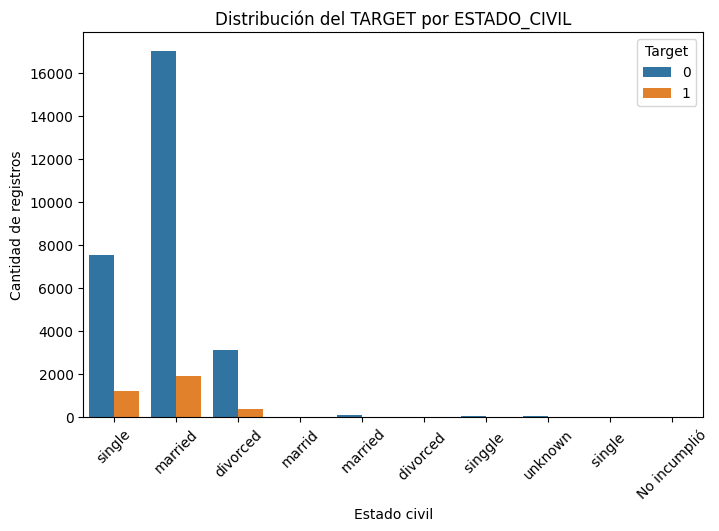

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x='ESTADO_CIVIL', hue=target)
plt.title('Distribución del TARGET por ESTADO_CIVIL')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de registros')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.show()


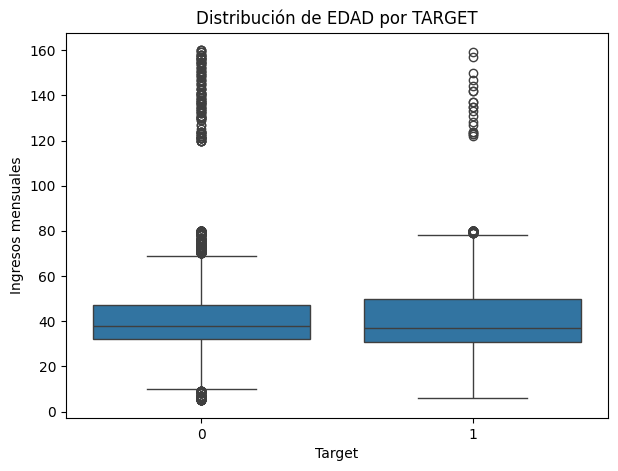

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, x=target, y='EDAD')
plt.title('Distribución de EDAD por TARGET')
plt.xlabel('Target')
plt.ylabel('Ingresos mensuales')
plt.show()


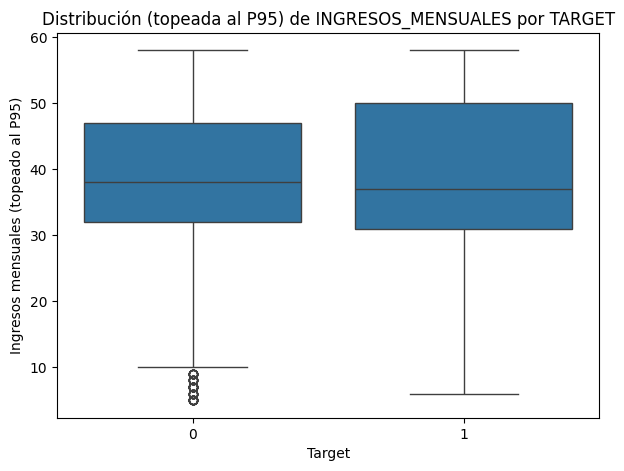

In [73]:
# Calcular el percentil 95
p95 = df_train['EDAD'].quantile(0.95)

# Toppear (capear) los valores mayores al percentil 95
df_train['EDAD_TOPEADO'] = df_train['EDAD'].clip(upper=p95)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.boxplot(data=df_train, x=target, y='EDAD_TOPEADO')
plt.title('Distribución (topeada al P95) de INGRESOS_MENSUALES por TARGET')
plt.xlabel('Target')
plt.ylabel('Ingresos mensuales (topeado al P95)')
plt.show()



C:\Users\gprad\AppData\Local\Temp\ipykernel_13032\1029593059.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target')


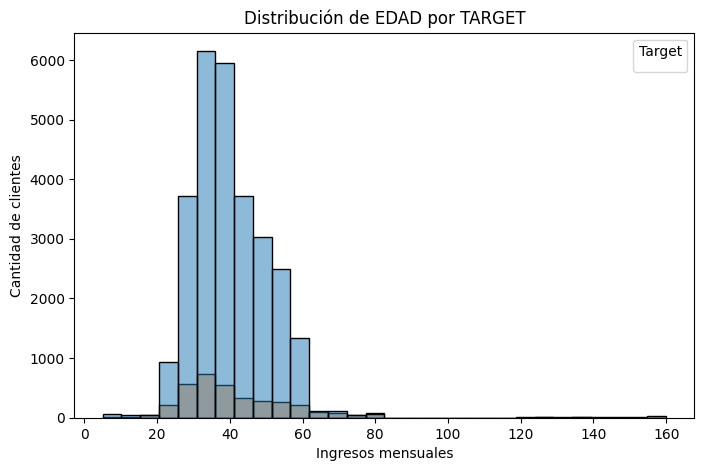

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(
    data=df_train,
    x='EDAD',    # tu variable numérica
    hue=target,               # separa por target (colores)
    bins=30,                    # número de barras
    kde=False,                  # activa curva si quieres suavizar
    stat='count',               # puede ser 'percent' o 'density'
    multiple='layer'            # 'stack' o 'dodge' o 'layer'
)
plt.title('Distribución de EDAD por TARGET')
plt.xlabel('Ingresos mensuales')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Target')
plt.show()


In [74]:
import pandas as pd

dummies = pd.get_dummies(df_train['ESTADO_CIVIL'], prefix='ESTADO_CIVIL')


In [75]:
dummies

,ESTADO_CIVIL_ married,ESTADO_CIVIL_No incumplió,ESTADO_CIVIL_divorced,ESTADO_CIVIL_divorced,ESTADO_CIVIL_marrid,ESTADO_CIVIL_married,ESTADO_CIVIL_singgle,ESTADO_CIVIL_single,ESTADO_CIVIL_single,ESTADO_CIVIL_unknown
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
31473,False,False,False,False,False,False,False,True,False,False
31474,False,False,True,False,False,False,False,False,False,False
31475,False,False,False,False,False,False,False,True,False,False
31476,False,False,False,False,True,False,False,False,False,False


In [78]:
# Crear las dummies
dummies = pd.get_dummies(df_train['ESTADO_CIVIL'], prefix='ESTADO_CIVIL', drop_first=True).astype(int)

# Unirlas al df original
df_train = pd.concat([df_train, dummies], axis=1)


In [79]:
df_train

,ID,EDAD,TRABAJO,ESTADO_CIVIL,EDUCACION,INCUMPLIMIENTO,VIVIENDA,PRESTAMO,TIPO_CONTACTO,MES,...,ESTADO_CIVIL_unknown,ESTADO_CIVIL_No incumplió,ESTADO_CIVIL_divorced,ESTADO_CIVIL_divorced,ESTADO_CIVIL_marrid,ESTADO_CIVIL_married,ESTADO_CIVIL_singgle,ESTADO_CIVIL_single,ESTADO_CIVIL_single,ESTADO_CIVIL_unknown
0,24004,27,self-employed,single,university.degree,No incumplió,no,no,telephone,aug,...,False,0,0,0,0,0,0,1,0,0
1,24003,43,technician,single,professional.course,No incumplió,no,no,telephone,aug,...,False,0,0,0,0,0,0,1,0,0
2,23998,44,admin.,married,high.school,No incumplió,yes,no,telephone,aug,...,False,0,0,0,0,1,0,0,0,0
3,24005,46,admin.,divorced,high.school,No incumplió,yes,no,telephone,aug,...,False,0,1,0,0,0,0,0,0,0
4,23999,42,admin.,married,high.school,No incumplió,yes,yes,telephone,aug,...,False,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,39392,56,admin.,single,university.degree,No incumplió,yes,no,cellular,mar,...,False,0,0,0,0,0,0,1,0,0
31474,39389,56,unemployed,divorced,basic.4y,No incumplió,yes,no,cellular,mar,...,False,0,1,0,0,0,0,0,0,0
31475,39391,56,admin.,single,university.degree,No incumplió,yes,no,cellular,mar,...,False,0,0,0,0,0,0,1,0,0
31476,39387,64,retired,marrid,basic.4y,No incumplió,yes,no,cellular,mar,...,False,0,0,0,1,0,0,0,0,0


In [ ]:
import numpy as np

df_train['FLG_EDAD_25'] = np.where(df_train['EDAD'] > 24, 'ALTO', 'BAJO')


# df_train['FLAG_RIESGO'] = np.where(
#     (df_train['INGRESOS_MENSUALES'] > 5000) & (df_train['TARGET'] == 1),
#     'RIESGO',
#     'NORMAL'
# )


# df_train['CATEGORIA_INGRESO'] = np.where(
#     df_train['INGRESOS_MENSUALES'] > 8000, 'ALTO',
#     np.where(df_train['INGRESOS_MENSUALES'] > 4000, 'MEDIO', 'BAJO')
# )




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt


# Separar variables
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

# Dividir 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
tree = DecisionTreeClassifier(
    max_depth=5,              # Controla la complejidad del árbol
    class_weight='balanced',  # Corrige el desbalance del target
    random_state=42
)
tree.fit(X_train, y_train)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,         # número de árboles
    max_depth=6,
    class_weight='balanced',  # ajusta pesos según frecuencia de clases
    random_state=42,
    n_jobs=-1                 # usa todos los núcleos
)
rf.fit(X_train, y_train)


In [ ]:
def evaluar_modelo(modelo, X_test, y_test, nombre="Modelo"):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    gini = 2 * auc - 1

    print(f"\n🔹 {nombre}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"Precision: {pre:.3f}")
    print(f"F1-score : {f1:.3f}")
    print(f"AUC      : {auc:.3f}")
    print(f"Gini     : {gini:.3f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()
